In [6]:
import numpy as np

# SOME REASONINGS ABOUT HOW DFT WORKS

# so the same way we can find how similar 2 vectors are
# by adding up the products of their coordinates
# i.e. dot product x1 * x2 + y1 * y2 + ...

# we can find how similar 2 FUNCTIONS are
# by summing the products of their values
# i.e. f(x0) * g(x0) + f(x1) * g(x1) + ...

# that would be their CORRELATION

# in Fourier Analysis we want to extract frequencies from a signal
# to do that we take a set of frequencies
# and for each frequency from that set
# we define a sinusoid AT THAT FREQUENCY
# and correlate it with the signal
# if the correlation is big then the frequency is likely to be present in the signal

# FOR EXAMPLE let's take a signal with a frequency of 400Hz

# of course we need to pick a discretization frequency for the signal
Fs = 1000

# and a number of samples that we will consider (can't consider an infinite range)
N = 1024

# this is the distance between samples in time
dt = 1 / Fs

# time, equally spaced points
t = np.linspace(0, (N - 1) * dt, N)

# the 400Hz signal
y = np.sin(400 * 2 * np.pi * t)

# let's try correlating it with a 300Hz sinusoid
x = np.sin(300 * 2 * np.pi * t)
print(np.sum(y * x))

# ^ it evaluates to a small near-zero value hence no correlation at 300Hz

# now let's correlate it at the exact frequency of the signal
x = np.sin(400 * 2 * np.pi * t)
print(np.sum(y * x))

# ^ it will evaluate to a large value hence there's a correlation

0.559016994377084
512.154508497189


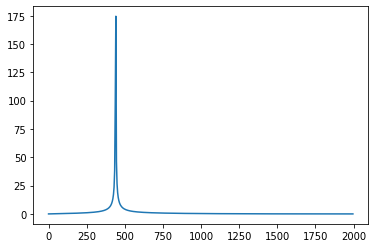

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# now we extend this idea to extract A SET of frequencies instead of just one frequency
# but which frequencies should be in that set?

# by Nyquist Theorem we know that we can't detect frequencies
# higher than half of our discretization rate so Fmax = Fs / 2
# for simplicity let's ignore the denominator and just say that Fmax = Fs
# we'll take Fmin = 0, since negative frequencies don't make sense in our context

# now we have a continous range of frequencies from 0 to Fs that we can look for in a signal
# we can't look at every single frequency in that range so we discretize it

# we do this by dividing it into N number of equally spaced points
# where N is the number of samples

# so the distance between each frequency df is
# df = Fs / N

# if the amount of samples is small then
# the distance between frequencies is big
# so we have a poor FREQUENCY RESOLUTION
# and as the amount of samples increases
# the frequency resolution goes higher

# which makes perfect sense as it's hard to decide
# which frequencies are in a signal if we have only a few samples of it
# and it gets increasingly more accurate as we increase the amount of samples

# now let's codify this

def dft(samples):
  # dt = 1 / Fs - distance between samples in time
  # df = Fs / N - distance between samples in frequency

  # we have N frequencies and k-th frequency equals
  # f_k = k * df = k * Fs / N
  
  # we have N time points and n-th time value equals
  # t_n = n * dt = n / Fs

  # our sinusoid will look like this
  # sin(2 * pi * f_k * t_n)

  # after substituting and simplifying everything we get
  # sin(2 * pi * k * n / N)

  # note that the discretization frequency cancelled out
  # so we don't need to know about it here!

  N = len(samples)
  output = [0] * N

  for k in range(0, N - 1):
    correlation = 0

    for n in range(0, N - 1):
      correlation += samples[n] * np.sin(2 * np.pi * k * n / N)

    # taking abs because correlation can go negative
    # but we're only interested in how far away it's from zero
    output[k] = abs(correlation)

  return output

# setup some test data
N = 1024

Fs = 4000
dt = 1 / Fs
df = Fs / N

t = np.linspace(0, (N - 1) * dt, N)
f = np.linspace(0, (N - 1) * df, N)

# signal frequency
f0 = 440
# actual signal
y = np.sin(2 * np.pi * f0 * t)

X = dft(y)

# drop values above the Nyquist frequency
plt.plot(f[0:int(N/2)], X[0:int(N/2)])

# ^ should diplsy a sharp peak around f0